#Hospital Compare - Readmission rates: 
#https://data.medicare.gov/Hospital-Compare/Hospital-Readmissions-Reduction-Program/9n3s-kdb3

#Hospital Info (including addresses):
#https://data.medicare.gov/Hospital-Compare/Hospital-General-Information/xubh-q36u

#2017 Wage Index:
#https://www.cms.gov/Medicare/Medicare-Fee-for-Service-Payment/AcuteInpatientPPS/Wage-Index-Files-Items/FY2017-Wage-Index-Home-Page.html?DLPage=1&DLEntries=10&DLSort=1&DLSortDir=descending

#Census Data - median household income by county

### Set up

In [86]:
from __future__ import print_function, division
#Import BeautifulSoup
from bs4 import BeautifulSoup
#Regular expressions compiler
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import pickle

In [3]:
# if needed: pip install requests or conda install requests
import requests

requests.__path__

['/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/requests']

In [5]:
url = 'https://data.medicare.gov/Hospital-Compare/Hospital-Readmissions-Reduction-Program/9n3s-kdb3'

response = requests.get(url)
response.status_code

200

In [145]:
# url2 = "https://en.wikipedia.org/wiki/List_of_hospitals_in_California"
url2 = "https://www.onlyinyourstate.com/northern-california/san-francisco/10-hospitals-san-francisco/"
response2 = requests.get(url2)
soup2 = BeautifulSoup(response2.text, "lxml")
print(soup2.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en-US" xmlns="https://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="https://opengraphprotocol.org/schema/">
 <head profile="https://gmpg.org/xfn/11">
  <title>
   10 Best Hospitals Around San Francisco
  </title>
  <script>
   dataLayer = [{"pagetype":"Article","category":"San Francisco","author_type":"OIYS Author","author":"jgarr"}];
  </script>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
		new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
		j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
		'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
		})(window,document,'script','dataLayer','GTM-WGZCHF');
  </script>
  <!-- End Google Tag Manager -->
  <meta charset="utf-8"/>
  <meta content="width=device-width, user-scalable=yes" name="viewport"/>
  <link href="https://dtjew9b6f6zyn.cloud

In [6]:
print(response.text)

<!doctype html>
<html lang="en">


  <!--
  Powered by Socrata
  http://www.socrata.com
  -->

  

  <head>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="csrf-param" content="authenticity_token" />
<meta name="csrf-token" content="rbaEawpxKEpDcO9Q3ingaKHKasMFQwEHq5NToojL+3p5gxItZhZiktYKuI2VrskyV7Ve71c68pj7tPUdwgSsxw==" />
    
<script>
//<![CDATA[
var socrata = {"currentUser":null,"domain":"data.medicare.gov","environment":"production","featureFlags":{"notify_import_result":false,"in_dataset_search":"cly","embetter_analytics_page":false,"visualization_canvas_embed_button":"always","tyler_privacy_policy":false,"enable_colocate_ui":false,"display_dataset_landing_page_notice":false,"ignore_hiding_columns_unhidden_on_derived_views":true,"feature_map_default_extent":"'{\"southwest\":[-22.593726063929296, -215.859375],\"northeast\":[75.32002523220804, -4.921875]}'","enable_vertical_filter_bar":true,"visualization_canvas_look_up_attribution_domain":true,"domain_loc

In [7]:
page = response.text

In [9]:
soup = BeautifulSoup(page, "lxml")

In [11]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <!--
  Powered by Socrata
  http://www.socrata.com
  -->
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="authenticity_token" name="csrf-param"/>
  <meta content="rbaEawpxKEpDcO9Q3ingaKHKasMFQwEHq5NToojL+3p5gxItZhZiktYKuI2VrskyV7Ve71c68pj7tPUdwgSsxw==" name="csrf-token"/>
  <script>
   //<![CDATA[
var socrata = {"currentUser":null,"domain":"data.medicare.gov","environment":"production","featureFlags":{"notify_import_result":false,"in_dataset_search":"cly","embetter_analytics_page":false,"visualization_canvas_embed_button":"always","tyler_privacy_policy":false,"enable_colocate_ui":false,"display_dataset_landing_page_notice":false,"ignore_hiding_columns_unhidden_on_derived_views":true,"feature_map_default_extent":"'{\"southwest\":[-22.593726063929296, -215.859375],\"northeast\":[75.32002523220804, -4.921875]}'","enable_vertical_filter_bar":true,"visualization_canvas_look_up_attribution_domain":true,"domain_locale":"en_US"

In [14]:
print(soup.a.prettify())

<a class="skip-link" href="#content" title="skip to content">
 Skip to Main Content
</a>



In [16]:
print(soup.find('a').findNextSibling())

None


In [38]:
len(soup.find_all('a'))

27

In [18]:
for link in soup.find_all('a'): 
    print(link)

<a class="skip-link" href="#content" title="skip to content">
        Skip to Main Content
      </a>
<a class="logo" href="/"><img alt="Data.Medicare.gov" onerror='this.style.display="none"' src="/api/assets/0997FFC4-855B-45EA-8A46-CC845BF31A5B?data.medicare.gov-header.png"/><span class="site-name"></span></a>
<a class="sign-in-toggle site-chrome-btn" href="/login">Sign In</a>
<a class="site-chrome-nav-link noselect" href="/">Home</a>
<a class="site-chrome-nav-link noselect" href="/get-started">Get started</a>
<a class="site-chrome-nav-link noselect" href="/about">Info</a>
<a class="site-chrome-nav-link noselect" href="/developers">Developers</a>
<a class="site-chrome-btn menu-toggle" href="#">
<span class="socrata-icon-hamburger"></span>
            Menu
          </a>
<a aria-label="Close" class="menu-toggle" href="#">
<span class="socrata-icon-close-2"><span class="aria-not-displayed">Close</span></span>
</a>
<a class="site-chrome-nav-link mobile-button noselect" href="/">Home</a>


In [44]:
# 'a' is the tag, 'href' is the thing within the tag
soup.find('a')['href']

'#content'

In [24]:
print(soup.find(text="skip to content"))

None


In [39]:
soup.body.find_all(text="apiFoundryUrl")

[]

In [61]:
test = re.compile('apiFoundryUrl')
a = soup.find(text=test)
a

'\n    var initialState =\n      {"view":{"allAccessPoints":[],"apiFoundryUrl":"https://dev.socrata.com/foundry/data.medicare.gov/9n3s-kdb3","attachments":null,"attribution":null,"attributionLink":null,"blobFilename":null,"blobId":null,"blobMimeType":null,"blobType":false,"bootstrapUrl":"/d/9n3s-kdb3/visualization","canPublish":false,"cartoUrl":null,"category":"Hospital Compare","collectionParentView":null,"columns":[{"id":411300675,"name":"Hospital Name","fieldName":"hospital_name","position":1,"width":252,"dataTypeName":"text","renderTypeName":"text","tableColumnId":4193132,"cachedContents":{"largest":"ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER","non_null":19674,"null":"0","top":[{"item":"MEMORIAL HOSPITAL","count":"54"},{"item":"ST JOSEPH HOSPITAL","count":"42"},{"item":"GOOD SAMARITAN HOSPITAL","count":"42"},{"item":"ST JOSEPH MEDICAL CENTER","count":"30"},{"item":"MERCY HOSPITAL","count":"24"},{"item":"MERCY MEDICAL CENTER","count":"24"},{"item":"ST FRANCIS HOSPITAL","count":"24"}

In [59]:
test2 = re.compile('Measure Name')
b = soup.find(text=test2)
b.prettify()

AttributeError: 'NavigableString' object has no attribute 'prettify'

In [58]:
soup.find('a')['\n']

KeyError: '\n'

In [66]:
soup.find('td')

## import healthdata.gov datasets using API
HRRP API info: https://dev.socrata.com/foundry/data.medicare.gov/9n3s-kdb3
General Hospital API info: https://dev.socrata.com/foundry/data.medicare.gov/rbry-mqwu

ONLY RUN AS NEEDED AS THERE ARE STRICT THROTTLING LIMITS WITHOUT TOKEN! USE THE PICKLES

In [77]:
#!/usr/bin/env python

# # make sure to install these packages before running:
# # pip install pandas
# # pip install sodapy

# import pandas as pd
# from sodapy import Socrata

# # Unauthenticated client only works with public data sets. Note 'None'
# # in place of application token, and no username or password:
# client = Socrata("data.medicare.gov", None)

# # Example authenticated client (needed for non-public datasets):
# # client = Socrata(data.medicare.gov,
# #                  MyAppToken,
# #                  userame="user@example.com",
# #                  password="AFakePassword")

# # Results returned as JSON from API / converted to Python list of
# # dictionaries by sodapy.
# hrrp = client.get("9n3s-kdb3", limit=20000) #Readmissions scores
# geninfo = client.get("rbry-mqwu", limit=6000) #General hospital information

# # Convert to pandas DataFrame
# hrrp_df = pd.DataFrame.from_records(hrrp)
# geninfo_df = pd.DataFrame.from_records(geninfo)

In [82]:
# #pickle the datasets for later use
# with open('hrrp.pickle', 'wb') as to_write:
#     pickle.dump(hrrp_df, to_write)

# with open('geninfo.pickle', 'wb') as to_write:
#     pickle.dump(geninfo_df, to_write)
    
# !ls

## Import hospital wage index data

In [31]:
# local_path = "../../project 2/FY2017-NPRM-Tables-2-and-3/CMS 1655-P FY 2017 Proposed Rule Table 2.txt"
# local_path = "Users/Jocelyn/Metis/local projects/project 2/FY2017-NPRM-Tables-2-and-3/CMS 1655-P FY 2017 Proposed Rule Table 2.txt"
local_path = "CMS 1655-P FY 2017 Proposed Rule Table 2_2.txt"
wageindex = pd.read_csv(local_path, delimiter = "\t",header=None,names=['CCN','Case_Mix_Indexes','FY_2017_Wage_Index','Avg_Hourly_Wage_FY2015',
                                                                        'Avg_Hourly_Wage_FY2016','Avg_Hourly_Wage_FY2017','3_Year_Avg_Hourly_Wage_15_16_17',
                                                                        'Geographic_CBSA','Reclassified_Redesignated_CBSA','Lugar_NECMA','MGCRB_Reclass',
                                                                        'Hosp_Reclass','Out_Migration_Adj','County_Name','County_Code'])
wageindex.info()

with open('wageindex.pickle', 'wb') as to_write:
    pickle.dump(wageindex, to_write)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 15 columns):
CCN                                3586 non-null object
Case_Mix_Indexes                   3417 non-null float64
FY_2017_Wage_Index                 3586 non-null float64
Avg_Hourly_Wage_FY2015             3408 non-null float64
Avg_Hourly_Wage_FY2016             3367 non-null float64
Avg_Hourly_Wage_FY2017             3354 non-null float64
3_Year_Avg_Hourly_Wage_15_16_17    3483 non-null float64
Geographic_CBSA                    3586 non-null int64
Reclassified_Redesignated_CBSA     992 non-null float64
Lugar_NECMA                        68 non-null object
MGCRB_Reclass                      867 non-null object
Hosp_Reclass                       57 non-null object
Out_Migration_Adj                  693 non-null float64
County_Name                        3586 non-null object
County_Code                        3586 non-null int64
dtypes: float64(8), int64(2), object(5)
memory usage: 

## Open pickled datasets

In [2]:
with open('hrrp.pickle','rb') as read_file:
    hrrp_df = pickle.load(read_file)
    
hrrp_df.head(5)

,hospital_name,provider_id,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date,footnote
0,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_AMI_HRRP,798,1.0072,14.8575,14.7514,119,07/01/2014,06/30/2017,NaN
1,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_CABG_HRRP,290,1.1392,14.0204,12.3077,44,07/01/2014,06/30/2017,NaN
2,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_COPD_HRRP,569,0.9913,18.2153,18.3745,103,07/01/2014,06/30/2017,NaN
3,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_HF_HRRP,1061,1.0135,21.5968,21.3101,230,07/01/2014,06/30/2017,NaN
4,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_HIP_KNEE_HRRP,335,1.0468,5.0853,4.8582,18,07/01/2014,06/30/2017,NaN


In [3]:
with open('geninfo.pickle','rb') as read_file:
    geninfo_df = pickle.load(read_file)
    
geninfo_df.head(5)

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,...,:@computed_region_csmy_5jwy,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating_footnote,mortality_national_comparison_footnote,safety_of_care_national_comparison_footnote,readmission_national_comparison_footnote,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison_footnote
0,260096,NORTH KANSAS CITY HOSPITAL,2800 CLAY EDWARDS DRIVE,NORTH KANSAS CITY,MO,64116,CLAY,8166912000,Acute Care Hospitals,Government - Local,...,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,450775,HCA HOUSTON HEALTHCARE KINGWOOD,22999 US HWY 59,KINGWOOD,TX,77325,HARRIS,2813597500,Acute Care Hospitals,Proprietary,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200008,NORTHERN LIGHT HEALTH,144 STATE STREET,PORTLAND,ME,04101,CUMBERLAND,2078793000,Acute Care Hospitals,Voluntary non-profit - Church,...,49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,210018,MEDSTAR MONTGOMERY MEDICAL CENTER,18101 PRINCE PHILIP DRIVE,OLNEY,MD,20832,MONTGOMERY,3017748882,Acute Care Hospitals,Voluntary non-profit - Private,...,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,154056,EVANSVILLE STATE HOSPITAL,3400 LINCOLN AVENUE,EVANSVILLE,IN,47714,VANDERBURGH,8124696800,Psychiatric,Government - State,...,35,NaN,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...


In [33]:
with open('wageindex.pickle','rb') as read_file:
    wageindex_df = pickle.load(read_file)
    
wageindex_df.head(5)

,CCN,Case_Mix_Indexes,FY_2017_Wage_Index,Avg_Hourly_Wage_FY2015,Avg_Hourly_Wage_FY2016,Avg_Hourly_Wage_FY2017,3_Year_Avg_Hourly_Wage_15_16_17,Geographic_CBSA,Reclassified_Redesignated_CBSA,Lugar_NECMA,MGCRB_Reclass,Hosp_Reclass,Out_Migration_Adj,County_Name,County_Code
0,010001,1.6674,0.7685,28.4012,29.1656,29.4683,29.0170,20020,18880.0,NaN,Y,NaN,NaN,HOUSTON,1340
1,010005,1.3532,0.8062,27.7541,28.1275,27.6108,27.8412,1,26620.0,NaN,Y,NaN,0.0543,MARSHALL,1470
2,010006,1.6485,0.6846,27.9861,26.1226,27.5383,27.2115,22520,NaN,NaN,NaN,NaN,NaN,LAUDERDALE,1380
3,010007,1.0549,0.6846,22.1117,23.3987,25.2727,23.5140,1,NaN,NaN,NaN,NaN,NaN,COVINGTON,1190
4,010008,0.9245,0.6973,23.7130,27.7051,25.2267,25.5436,1,NaN,NaN,NaN,NaN,0.0127,CRENSHAW,1200


In [34]:
!ls

CMS 1655-P FY 2017 Proposed Rule Table 2.htm
CMS 1655-P FY 2017 Proposed Rule Table 2.txt
CMS 1655-P FY 2017 Proposed Rule Table 2_2.txt
geninfo.pickle
hrrp.pickle
wageindex.pickle
web scraping.ipynb


## Check/clean data

### General Info

In [92]:
geninfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 36 columns):
provider_id                                                      5334 non-null object
hospital_name                                                    5334 non-null object
address                                                          5334 non-null object
city                                                             5334 non-null object
state                                                            5334 non-null object
zip_code                                                         5334 non-null object
county_name                                                      5334 non-null object
phone_number                                                     5334 non-null object
hospital_type                                                    5334 non-null object
hospital_ownership                                               5334 non-null object
emergency_services               

In [37]:
geninfo_df["location_zip"].unique()

array(['64116', '77325', '04101', ..., '58341', '18301', '13901'],
      dtype=object)

In [175]:
geninfo = geninfo_df.loc[:,['provider_id','hospital_name','state','zip_code','county_name','hospital_type',
                     'hospital_ownership','emergency_services','hospital_overall_rating',
                     'mortality_national_comparison']]
geninfo['county_st'] = geninfo['county_name']+"_"+geninfo['state']
geninfo.head(5)

,provider_id,hospital_name,state,zip_code,county_name,hospital_type,hospital_ownership,emergency_services,hospital_overall_rating,mortality_national_comparison,county_st
0,260096,NORTH KANSAS CITY HOSPITAL,MO,64116,CLAY,Acute Care Hospitals,Government - Local,True,3,Same as the national average,CLAY_MO
1,450775,HCA HOUSTON HEALTHCARE KINGWOOD,TX,77325,HARRIS,Acute Care Hospitals,Proprietary,True,3,Above the national average,HARRIS_TX
2,200008,NORTHERN LIGHT HEALTH,ME,04101,CUMBERLAND,Acute Care Hospitals,Voluntary non-profit - Church,True,5,Same as the national average,CUMBERLAND_ME
3,210018,MEDSTAR MONTGOMERY MEDICAL CENTER,MD,20832,MONTGOMERY,Acute Care Hospitals,Voluntary non-profit - Private,True,3,Same as the national average,MONTGOMERY_MD
4,154056,EVANSVILLE STATE HOSPITAL,IN,47714,VANDERBURGH,Psychiatric,Government - State,False,Not Available,Not Available,VANDERBURGH_IN


In [45]:
geninfo['hospital_ownership'].value_counts()

Voluntary non-profit - Private                 2191
Proprietary                                    1067
Government - Hospital District or Authority     541
Voluntary non-profit - Other                    434
Government - Local                              431
Voluntary non-profit - Church                   331
Government - State                              209
Physician                                        70
Government - Federal                             51
Tribal                                            9
Name: hospital_ownership, dtype: int64

In [46]:
geninfo['hospital_type'].value_counts()

Acute Care Hospitals         3310
Critical Access Hospitals    1351
Psychiatric                   576
Childrens                      97
Name: hospital_type, dtype: int64

In [47]:
geninfo['emergency_services'].value_counts()

True     4486
False     848
Name: emergency_services, dtype: int64

In [48]:
geninfo['hospital_overall_rating'].value_counts()

Not Available    1631
3                1254
4                1085
2                 792
5                 291
1                 281
Name: hospital_overall_rating, dtype: int64

### Hospital Readmissions info

In [49]:
hrrp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19674 entries, 0 to 19673
Data columns (total 12 columns):
hospital_name                 19674 non-null object
provider_id                   19674 non-null object
state                         19674 non-null object
measure_name                  19674 non-null object
number_of_discharges          19674 non-null object
excess_readmission_ratio      19674 non-null object
predicted_readmission_rate    19674 non-null object
expected_readmission_rate     19674 non-null object
number_of_readmissions        19674 non-null object
start_date                    19674 non-null object
end_date                      19674 non-null object
footnote                      8157 non-null object
dtypes: object(12)
memory usage: 1.8+ MB


In [50]:
hrrp_df['measure_name'].value_counts()

READM_30_HF_HRRP          3279
READM_30_COPD_HRRP        3279
READM_30_AMI_HRRP         3279
READM_30_HIP_KNEE_HRRP    3279
READM_30_PN_HRRP          3279
READM_30_CABG_HRRP        3279
Name: measure_name, dtype: int64

In [95]:
hrrp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19674 entries, 0 to 19673
Data columns (total 12 columns):
hospital_name                 19674 non-null object
provider_id                   19674 non-null object
state                         19674 non-null object
measure_name                  19674 non-null object
number_of_discharges          11655 non-null float64
excess_readmission_ratio      14280 non-null float64
predicted_readmission_rate    14280 non-null float64
expected_readmission_rate     14280 non-null float64
number_of_readmissions        11532 non-null float64
start_date                    19674 non-null datetime64[ns]
end_date                      19674 non-null datetime64[ns]
footnote                      8157 non-null object
dtypes: datetime64[ns](2), float64(5), object(5)
memory usage: 1.8+ MB


In [100]:
# Clean data:
# convert numeric columns to numeric format
num_cols = ['number_of_discharges','excess_readmission_ratio','predicted_readmission_rate',
            'expected_readmission_rate','number_of_readmissions']
for col in num_cols:
    hrrp_df[col].replace('Not Available',np.NaN, inplace=True)
    hrrp_df[col] = hrrp_df[col].astype(float, inplace=True)
    
# convert dates into date format
# hrrp_df['start_date']= [dt.datetime.strptime(x, '%m/%d/%Y') for x in hrrp_df['start_date']]
# hrrp_df['end_date']= [dt.datetime.strptime(x, '%m/%d/%Y') for x in hrrp_df['end_date']]
hrrp_df["readmitrate_calc"] = (hrrp_df['number_of_readmissions']/hrrp_df['number_of_discharges'])*100
hrrp_df["readmitrate_ratio"] = hrrp_df["readmitrate_calc"]/hrrp_df["predicted_readmission_rate"]

hrrp_df.info()
hrrp_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19674 entries, 0 to 19673
Data columns (total 14 columns):
hospital_name                 19674 non-null object
provider_id                   19674 non-null object
state                         19674 non-null object
measure_name                  19674 non-null object
number_of_discharges          11655 non-null float64
excess_readmission_ratio      14280 non-null float64
predicted_readmission_rate    14280 non-null float64
expected_readmission_rate     14280 non-null float64
number_of_readmissions        11532 non-null float64
start_date                    19674 non-null datetime64[ns]
end_date                      19674 non-null datetime64[ns]
footnote                      8157 non-null object
readmitrate_calc              11532 non-null float64
readmitrate_ratio             11532 non-null float64
dtypes: datetime64[ns](2), float64(7), object(5)
memory usage: 2.1+ MB


,hospital_name,provider_id,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date,footnote,readmitrate_calc,readmitrate_ratio
0,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_AMI_HRRP,798.0,1.0072,14.8575,14.7514,119.0,2014-07-01,2017-06-30,NaN,14.912281,1.003687
1,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_CABG_HRRP,290.0,1.1392,14.0204,12.3077,44.0,2014-07-01,2017-06-30,NaN,15.172414,1.082167
2,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_COPD_HRRP,569.0,0.9913,18.2153,18.3745,103.0,2014-07-01,2017-06-30,NaN,18.101933,0.993776
3,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_HF_HRRP,1061.0,1.0135,21.5968,21.3101,230.0,2014-07-01,2017-06-30,NaN,21.677663,1.003744
4,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_HIP_KNEE_HRRP,335.0,1.0468,5.0853,4.8582,18.0,2014-07-01,2017-06-30,NaN,5.373134,1.056601


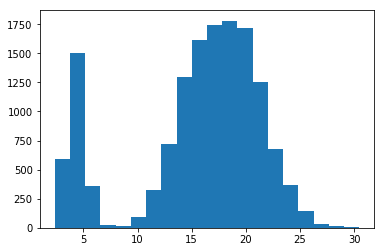

In [81]:
plt.hist(hrrp_df['predicted_readmission_rate'],bins=20);

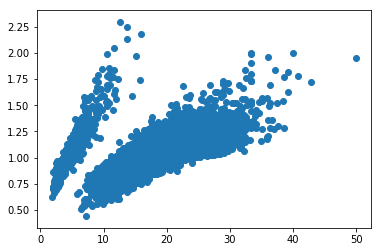

In [105]:
plt.scatter(hrrp_df['readmitrate_calc'],hrrp_df['readmitrate_ratio'])

In [112]:
hrrp_1 = hrrp_df.groupby(['provider_id']).count().sort_values(by='excess_readmission_ratio')
hrrp_1.loc[hrrp_1['excess_readmission_ratio'] < 6]

,hospital_name,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date,footnote,readmitrate_calc,readmitrate_ratio
provider_id,,,,,,,,,,,,,
670124,6,6,6,0,0,0,0,0,6,6,6,0,0
450831,6,6,6,0,0,0,0,0,6,6,6,0,0
370199,6,6,6,0,0,0,0,0,6,6,6,0,0
370201,6,6,6,0,0,0,0,0,6,6,6,0,0
370206,6,6,6,0,0,0,0,0,6,6,6,0,0
050548,6,6,6,0,0,0,0,0,6,6,6,0,0
370214,6,6,6,0,0,0,0,0,6,6,6,0,0
370216,6,6,6,1,0,0,0,0,6,6,6,0,0
070038,6,6,6,0,0,0,0,0,6,6,6,0,0


(array([183., 169.,  67., 354., 583., 955., 968.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

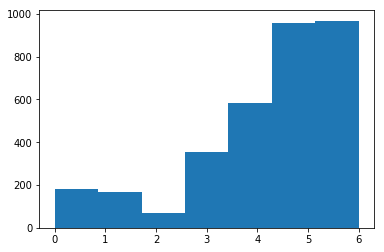

In [114]:
plt.hist(hrrp_1['excess_readmission_ratio'],bins=7)

In [121]:
hrrp_df.loc[hrrp_df['provider_id']=='230144']

,hospital_name,provider_id,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date,footnote,readmitrate_calc,readmitrate_ratio
9036,FOREST HEALTH MEDICAL CENTER,230144,MI,READM_30_AMI_HRRP,NaN,NaN,NaN,NaN,NaN,2014-07-01,2017-06-30,5 - Results are not available for this reporti...,NaN,NaN
9037,FOREST HEALTH MEDICAL CENTER,230144,MI,READM_30_CABG_HRRP,NaN,NaN,NaN,NaN,NaN,2014-07-01,2017-06-30,5 - Results are not available for this reporti...,NaN,NaN
9038,FOREST HEALTH MEDICAL CENTER,230144,MI,READM_30_COPD_HRRP,NaN,NaN,NaN,NaN,NaN,2014-07-01,2017-06-30,5 - Results are not available for this reporti...,NaN,NaN
9039,FOREST HEALTH MEDICAL CENTER,230144,MI,READM_30_HF_HRRP,NaN,NaN,NaN,NaN,NaN,2014-07-01,2017-06-30,5 - Results are not available for this reporti...,NaN,NaN
9040,FOREST HEALTH MEDICAL CENTER,230144,MI,READM_30_HIP_KNEE_HRRP,NaN,NaN,NaN,NaN,NaN,2014-07-01,2017-06-30,5 - Results are not available for this reporti...,NaN,NaN
9041,FOREST HEALTH MEDICAL CENTER,230144,MI,READM_30_PN_HRRP,NaN,NaN,NaN,NaN,NaN,2014-07-01,2017-06-30,5 - Results are not available for this reporti...,NaN,NaN


In [143]:
check = hrrp_df.loc[(hrrp_df['number_of_discharges'].isna()) & (hrrp_df['excess_readmission_ratio'].isna() == False)]

In [145]:
check['measure_name'].value_counts()

READM_30_HIP_KNEE_HRRP    1184
READM_30_AMI_HRRP          421
READM_30_CABG_HRRP         413
READM_30_COPD_HRRP         318
READM_30_HF_HRRP           212
READM_30_PN_HRRP           200
Name: measure_name, dtype: int64

In [146]:
check2 = hrrp_df.loc[(hrrp_df['number_of_discharges'].isna())]
check2['measure_name'].value_counts()

READM_30_CABG_HRRP        2672
READM_30_HIP_KNEE_HRRP    1940
READM_30_AMI_HRRP         1567
READM_30_COPD_HRRP         719
READM_30_HF_HRRP           602
READM_30_PN_HRRP           519
Name: measure_name, dtype: int64

In [150]:
hrrp_2 = hrrp_df.dropna(subset = ['number_of_discharges','excess_readmission_ratio',
                                  'predicted_readmission_rate','expected_readmission_rate',
                                  'number_of_readmissions'])

In [151]:
hrrp_2.shape

(11532, 14)

In [178]:
def my_agg(x):
    names = {'weighted_avg_ERR': (x['excess_readmission_ratio'] * x['number_of_discharges']).sum()/x['number_of_discharges'].sum()}
    return pd.Series(names, index=['weighted_avg_ERR'])

hrrp_3 = hrrp_2.groupby(['provider_id','start_date','end_date'], as_index=False).apply(my_agg).reset_index()
hrrp_3.shape

(2895, 4)

In [179]:
hrrp_3.head(10)

,provider_id,start_date,end_date,weighted_avg_ERR
0,010001,2014-07-01,2017-06-30,1.026958
1,010005,2014-07-01,2017-06-30,0.975498
2,010006,2014-07-01,2017-06-30,1.033804
3,010007,2014-07-01,2017-06-30,1.023081
4,010011,2014-07-01,2017-06-30,0.975355
5,010012,2014-07-01,2017-06-30,1.004785
6,010016,2014-07-01,2017-06-30,0.987508
7,010019,2014-07-01,2017-06-30,1.037402
8,010021,2014-07-01,2017-06-30,0.967344
9,010023,2014-07-01,2017-06-30,1.037243


In [174]:
hrrp_2.loc[hrrp_2['provider_id']=='010005']

,hospital_name,provider_id,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date,footnote,readmitrate_calc,readmitrate_ratio
8,MARSHALL MEDICAL CENTER SOUTH,010005,AL,READM_30_COPD_HRRP,641.0,0.9054,16.7351,18.4842,100.0,2014-07-01,2017-06-30,NaN,15.600624,0.932210
9,MARSHALL MEDICAL CENTER SOUTH,010005,AL,READM_30_HF_HRRP,337.0,1.0288,21.7164,21.1089,75.0,2014-07-01,2017-06-30,NaN,22.255193,1.024810
10,MARSHALL MEDICAL CENTER SOUTH,010005,AL,READM_30_HIP_KNEE_HRRP,284.0,1.0913,5.3414,4.8946,17.0,2014-07-01,2017-06-30,NaN,5.985915,1.120664
11,MARSHALL MEDICAL CENTER SOUTH,010005,AL,READM_30_PN_HRRP,759.0,0.9677,15.1414,15.6471,113.0,2014-07-01,2017-06-30,NaN,14.888011,0.983265


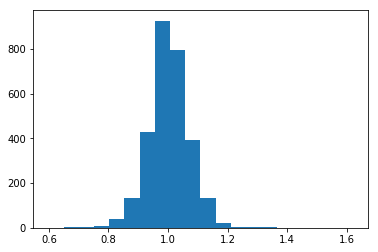

In [167]:
plt.hist(hrrp_3['weighted_avg_ERR'],bins=20);

### Wage Index data

In [182]:
wageindex = wageindex_df.loc[:,['CCN','Case_Mix_Indexes','FY_2017_Wage_Index','3_Year_Avg_Hourly_Wage_15_16_17']]
wageindex.head(5)

,CCN,Case_Mix_Indexes,FY_2017_Wage_Index,3_Year_Avg_Hourly_Wage_15_16_17
0,010001,1.6674,0.7685,29.0170
1,010005,1.3532,0.8062,27.8412
2,010006,1.6485,0.6846,27.2115
3,010007,1.0549,0.6846,23.5140
4,010008,0.9245,0.6973,25.5436


### Join data

In [187]:
#join readmit info to general hospital info

hosp = pd.merge(hrrp_3,geninfo,on='provider_id')
hosp = pd.merge(hosp,wageindex,left_on='provider_id',right_on='CCN').drop('CCN',axis=1)
hosp.info()
hosp.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2866
Data columns (total 17 columns):
provider_id                        2867 non-null object
start_date                         2867 non-null datetime64[ns]
end_date                           2867 non-null datetime64[ns]
weighted_avg_ERR                   2867 non-null float64
hospital_name                      2867 non-null object
state                              2867 non-null object
zip_code                           2867 non-null object
county_name                        2867 non-null object
hospital_type                      2867 non-null object
hospital_ownership                 2867 non-null object
emergency_services                 2867 non-null bool
hospital_overall_rating            2867 non-null object
mortality_national_comparison      2867 non-null object
county_st                          2867 non-null object
Case_Mix_Indexes                   2867 non-null float64
FY_2017_Wage_Index                 28

,provider_id,start_date,end_date,weighted_avg_ERR,hospital_name,state,zip_code,county_name,hospital_type,hospital_ownership,emergency_services,hospital_overall_rating,mortality_national_comparison,county_st,Case_Mix_Indexes,FY_2017_Wage_Index,3_Year_Avg_Hourly_Wage_15_16_17
0,010001,2014-07-01,2017-06-30,1.026958,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,True,2,Below the national average,HOUSTON_AL,1.6674,0.7685,29.0170
1,010005,2014-07-01,2017-06-30,0.975498,MARSHALL MEDICAL CENTER SOUTH,AL,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,True,1,Below the national average,MARSHALL_AL,1.3532,0.8062,27.8412
2,010006,2014-07-01,2017-06-30,1.033804,NORTH ALABAMA MEDICAL CENTER,AL,35630,LAUDERDALE,Acute Care Hospitals,Government - Hospital District or Authority,True,3,Below the national average,LAUDERDALE_AL,1.6485,0.6846,27.2115
3,010007,2014-07-01,2017-06-30,1.023081,MIZELL MEMORIAL HOSPITAL,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,True,1,Same as the national average,COVINGTON_AL,1.0549,0.6846,23.5140
4,010011,2014-07-01,2017-06-30,0.975355,ST VINCENT'S EAST,AL,35235,JEFFERSON,Acute Care Hospitals,Voluntary non-profit - Private,True,2,Same as the national average,JEFFERSON_AL,1.6728,0.8102,34.9671
5,010012,2014-07-01,2017-06-30,1.004785,DEKALB REGIONAL MEDICAL CENTER,AL,35968,DE KALB,Acute Care Hospitals,Proprietary,True,2,Below the national average,DE KALB_AL,1.2931,0.7303,27.9432
6,010016,2014-07-01,2017-06-30,0.987508,SHELBY BAPTIST MEDICAL CENTER,AL,35007,SHELBY,Acute Care Hospitals,Voluntary non-profit - Private,True,2,Same as the national average,SHELBY_AL,1.6846,0.8102,29.8306
7,010019,2014-07-01,2017-06-30,1.037402,HELEN KELLER MEMORIAL HOSPITAL,AL,35660,COLBERT,Acute Care Hospitals,Government - Hospital District or Authority,True,3,Same as the national average,COLBERT_AL,1.3603,0.6846,28.4497
8,010021,2014-07-01,2017-06-30,0.967344,DALE MEDICAL CENTER,AL,36360,DALE,Acute Care Hospitals,Government - Hospital District or Authority,True,3,Same as the national average,DALE_AL,1.3634,0.6987,26.2636
9,010023,2014-07-01,2017-06-30,1.037243,BAPTIST MEDICAL CENTER SOUTH,AL,36116,MONTGOMERY,Acute Care Hospitals,Government - Hospital District or Authority,True,2,Below the national average,MONTGOMERY_AL,1.9320,0.7429,31.3115


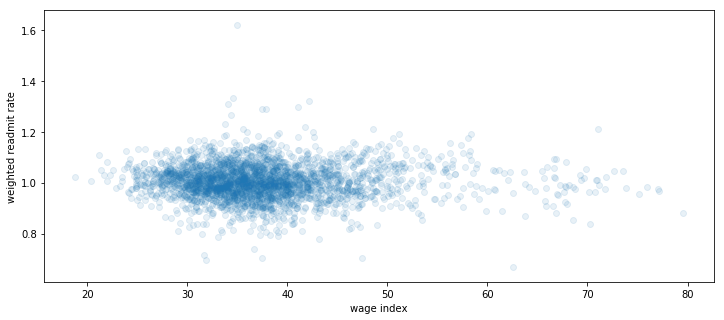

In [197]:
plt.figure(figsize=(12,5))
plt.scatter(hosp['3_Year_Avg_Hourly_Wage_15_16_17'],hosp['weighted_avg_ERR'],alpha=0.1)
plt.xlabel('wage index')
plt.ylabel('weighted readmit rate');